<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Находим-изменение-концентрации-металлов-на-различных-этапах-очистки" data-toc-modified-id="Находим-изменение-концентрации-металлов-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Находим изменение концентрации металлов на различных этапах очистки</a></span></li><li><span><a href="#Сравниваем-распределение-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравниваем-распределение-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравниваем распределение размеров гранул сырья на обучающей и тестовой выборках</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Пишем-функцию-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Пишем-функцию-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Пишем функцию для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучаем-различные-модели,-оцениваем-их-качество---выбираем-лучшую-и-прверяем-ее-на-тестовой-выборке" data-toc-modified-id="Обучаем-различные-модели,-оцениваем-их-качество---выбираем-лучшую-и-прверяем-ее-на-тестовой-выборке-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучаем различные модели, оцениваем их качество - выбираем лучшую и прверяем ее на тестовой выборке</a></span></li><li><span><a href="#Построим-константную-модели-и-сравним-данные" data-toc-modified-id="Построим-константную-модели-и-сравним-данные-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Построим константную модели и сравним данные</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.dummy import DummyRegressor

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go


import warnings
warnings.filterwarnings("ignore")
import matplotlib.patches as patches


In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
display(data_train.head(2))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184


In [4]:
display(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

In [5]:
display(data_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

# Расчет эффективности обогощения 

In [6]:
def recovery(C, F, T):
    recover = ((C*(F-T)) / (F*(C-T))) * 100
    return recover 

In [7]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

In [8]:
# сравниваем расчет эффективности обогащения по формуле с данными в столбце rougher.output.recovery обучающей выборки
recover = recovery(C, F, T)
print("Совпадающих значений:", sum(abs(data_train['rougher.output.recovery'] - recover) < 1))
print("Среднее значение эффективности по формуле:", recover.mean())
print("Среднеквадратичное отклонение MAE:", mean_absolute_error(data_train['rougher.output.recovery'], recover))    

Совпадающих значений: 14149
Среднее значение эффективности по формуле: 82.70450164550293
Среднеквадратичное отклонение MAE: 9.73512347450521e-15


In [9]:
data_train['rougher.output.recovery'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

Вывод: данные в таблице совпадают с рассчетами по формуле, среднеквадратичное отклонение незначительно, данные по эффективности обогащения в обучающей выборке корректны

In [10]:
# отсутсвующие колонки в тестовой выборке 
missing_columns = list(set(data_train.columns) - set(data_test.columns)) 

In [11]:
missing_columns

['primary_cleaner.output.concentrate_au',
 'rougher.output.concentrate_au',
 'secondary_cleaner.output.tail_pb',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.tail_au',
 'rougher.output.tail_pb',
 'final.output.concentrate_sol',
 'rougher.output.concentrate_pb',
 'rougher.output.tail_ag',
 'rougher.output.tail_sol',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'final.output.concentrate_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'primary_cleaner.output.tail_sol',
 'final.output.concentrate_ag',
 'rougher.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'final.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_au',
 'rougher.output.recovery',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_sol',
 'final.output.recovery',
 'secondary_cleaner.output.tail_au',
 'final.output.concent

Вывод: в тестовой выборке отсутствуют данные по результатам этапов обработки 

# Предобработка данных

In [12]:
# получаем информацию по данным из трех сетов
def data(data):
    print(f"Shape:      {data.shape}")
    print("Na's:      ",   data.isna().sum().sum())
    print("duplicates: ", data.duplicated().sum()) 

In [13]:
data(data_train)

Shape:      (14149, 87)
Na's:       4100
duplicates:  0


In [14]:
data(data_test)

Shape:      (5290, 53)
Na's:       90
duplicates:  0


In [15]:
data(data_full)

Shape:      (19439, 87)
Na's:       4481
duplicates:  0


## Анализ данных

### Находим изменение концентрации металлов на различных этапах очистки 

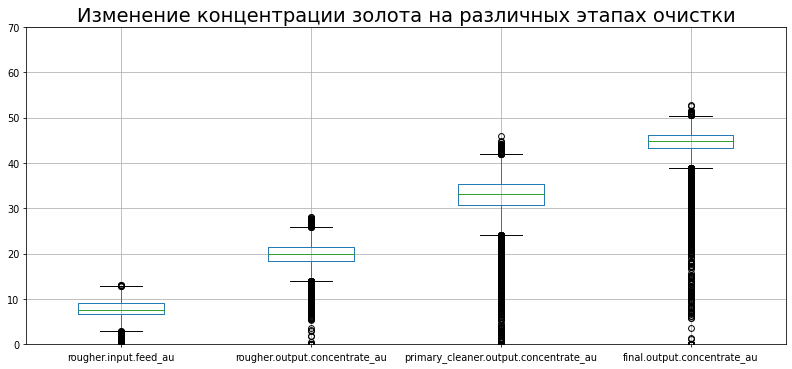

In [16]:
# находим изменеие концентрации золота  
gold= ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']

plt.figure(figsize=(14,6), dpi= 70)
plt.title('Изменение концентрации золота на различных этапах очистки', fontsize=20)
plt.ylim(0, 70)
data_train.boxplot(column = gold)
plt.show()

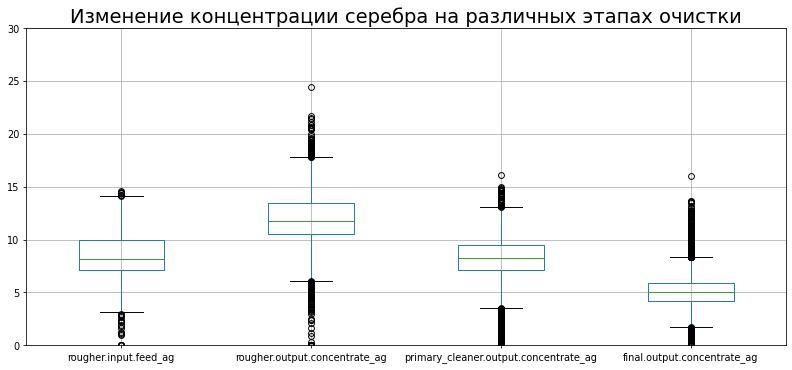

In [17]:
# находим изменеие концентрации серебра 
silver= ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 
       'final.output.concentrate_ag']

plt.figure(figsize=(14,6), dpi= 70)
plt.title('Изменение концентрации серебра на различных этапах очистки', fontsize=20)
plt.ylim(0, 30)
data_train.boxplot(column = silver)
plt.show()

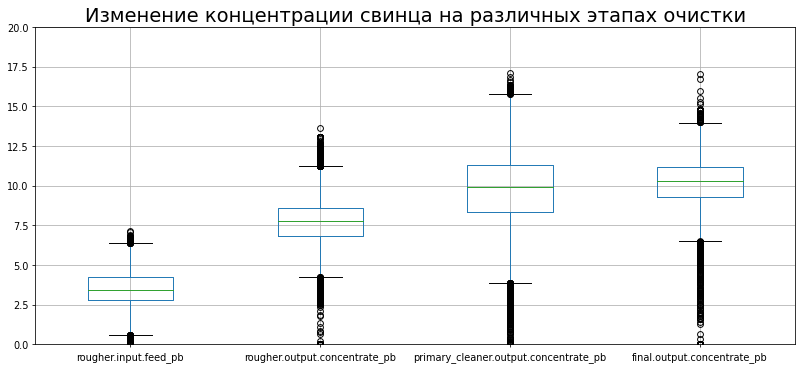

In [18]:
# находим изменеие концентрации свинца 
lead = ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 
       'final.output.concentrate_pb']

plt.figure(figsize=(14,6), dpi= 70)
plt.title('Изменение концентрации свинца на различных этапах очистки', fontsize=20)
plt.ylim(0, 20)
data_train.boxplot(column = lead)
plt.show()

Вывод:

- концентрация золота повышается на каждом этапе очистки  
- концентрация серебра снижается  
- концентрация свинца повышается, но в меньшей степени чем золото 
- по всем позициям наблюдается снижения разброса значений, есть заметные выбросы и нулевые значения  

### Сравниваем распределение размеров гранул сырья на обучающей и тестовой выборках 

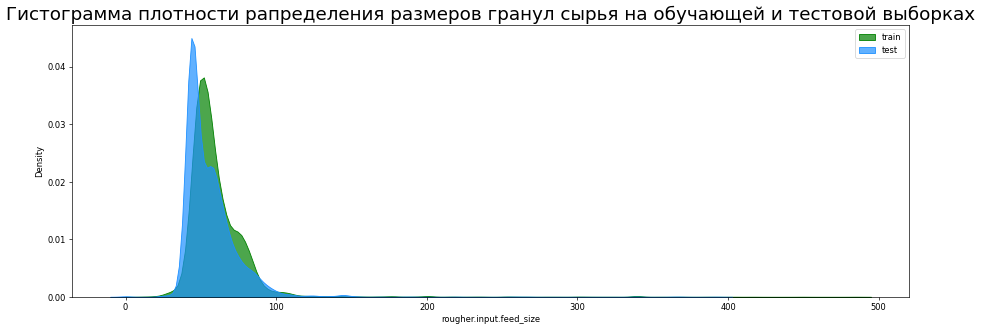

In [19]:
a = data_train['rougher.input.feed_size']
b = data_test['rougher.input.feed_size']
plt.figure(figsize=(18,6), dpi= 60)
sns.kdeplot(a, shade=True, color="g", label="train", alpha=.7)
sns.kdeplot(b, shade=True, color="dodgerblue", label="test", alpha=.7)

plt.title('Гистограмма плотности рапределения размеров гранул сырья на обучающей и тестовой выборках', fontsize=22)
plt.legend()
plt.show()

Вывод:

- распределение размеров гранул, а точнее их средних значений распределения на обучающей и тестовой выборках приблизительно равны  

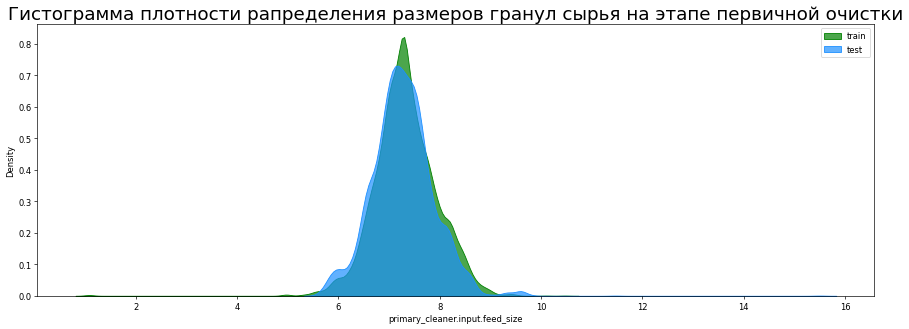

In [20]:
a = data_train['primary_cleaner.input.feed_size']
b = data_test['primary_cleaner.input.feed_size']
plt.figure(figsize=(18,6), dpi= 60)
sns.kdeplot(a, shade=True, color="g", label="train", alpha=.7)
sns.kdeplot(b, shade=True, color="dodgerblue", label="test", alpha=.7)

plt.title('Гистограмма плотности рапределения размеров гранул сырья на этапе первичной очистки', fontsize=22)
plt.legend()
plt.show()

Вывод:

- распределение размеров гранул, а точнее их средних значений распределения на обучающей и тестовой выборках на этапе первичной очистки также приблизительно равны  

# Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.


In [21]:
# суммируем данные по этапам переработки 

total_concentrate = pd.DataFrame()

total_concentrate['сырье'] = data_train[['rougher.input.feed_au', 'rougher.input.feed_ag',
                              'rougher.input.feed_pb']].sum(axis=1)
total_concentrate['черновой концентрат'] = data_train[['rougher.output.concentrate_au', 
                                            'rougher.output.concentrate_ag', 
                                            'rougher.output.concentrate_pb']].sum(axis=1)
total_concentrate['концентрат после очистки'] = data_train[['primary_cleaner.output.concentrate_au', 
                                                 'primary_cleaner.output.concentrate_ag', 
                                                 'primary_cleaner.output.concentrate_pb']].sum(axis=1)
total_concentrate['финальный концентрат'] = data_train[['final.output.concentrate_au', 
                                             'final.output.concentrate_ag', 
                                             'final.output.concentrate_pb']].sum(axis=1)

a1 = total_concentrate['сырье']
b1 = total_concentrate['черновой концентрат']
c1 = total_concentrate['концентрат после очистки']
d1 = total_concentrate['финальный концентрат'] 

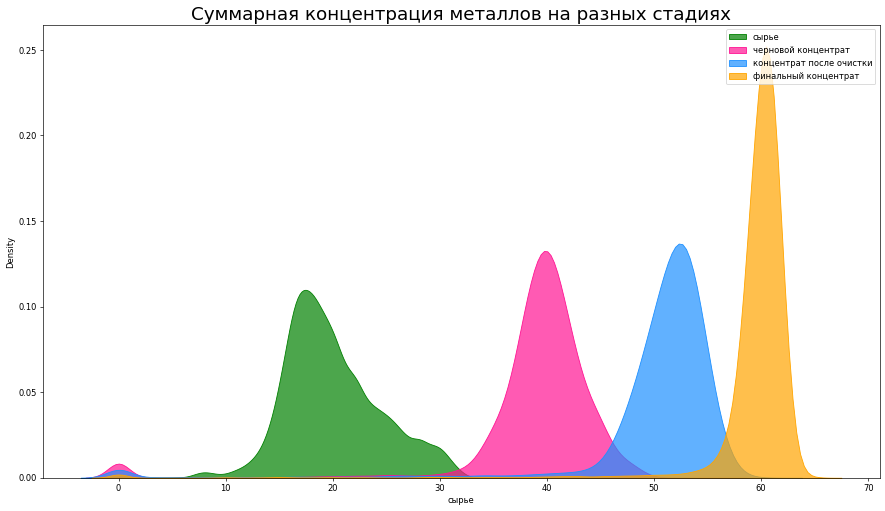

In [22]:
# визуализируем данные с помощью гистограммы распределения 
plt.figure(figsize=(18,10), dpi= 60)
sns.kdeplot(a1, shade=True, color="g", label="сырье", alpha=.7)
sns.kdeplot(b1, shade=True, color="deeppink", label="черновой концентрат", alpha=.7)
sns.kdeplot(c1, shade=True, color="dodgerblue", label="концентрат после очистки", alpha=.7)
sns.kdeplot(d1, shade=True, color="orange", label="финальный концентрат", alpha=.7)


plt.title('Суммарная концентрация металлов на разных стадиях', fontsize=22)
plt.legend()
plt.show()

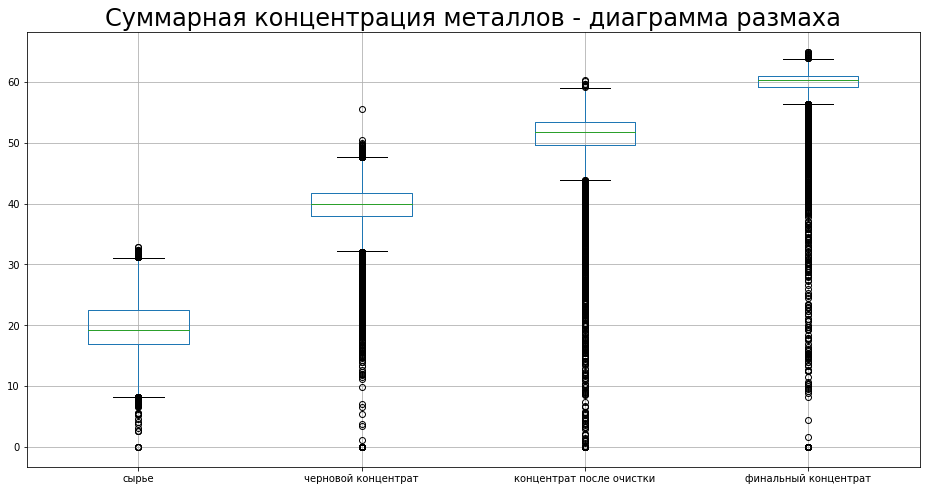

In [23]:
# дополнительно постороим диаграмму размаха для оценки плотности распределения и визуализации данных

plt.figure(figsize=(16, 8))
total_concentrate.boxplot(column=['сырье', 'черновой концентрат', 'концентрат после очистки', 'финальный концентрат' ])

plt.title('Суммарная концентрация металлов - диаграмма размаха', fontsize=24)
plt.show()

Вывод:
- распределения сильно скошены влево  
- в данных много выбросов, также есть значительное количество нулевых значений по всем позициям, которые необходимо удалить из тренировочной выборки, чтобы модель обучалась на корректных данных 

In [24]:
# удаляем прпуски в значениях NaN  
data_train = data_train.dropna()
data_test = data_test.dropna()

In [25]:
# удаляем аномальные значения (нули) из тренировочной выборки
for feature in [
    'rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb',
    'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
    'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb',
    'final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb'
]:
    data_train = data_train[data_train[feature] > 0]

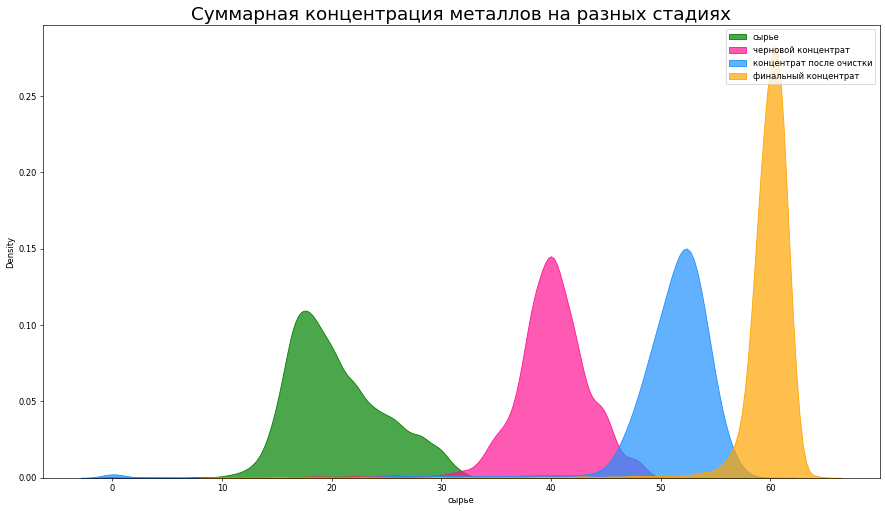

In [26]:
# суммируем данные по этапам переработки 

total_concentrate = pd.DataFrame()

total_concentrate['сырье'] = data_train[['rougher.input.feed_au', 'rougher.input.feed_ag',
                              'rougher.input.feed_pb']].sum(axis=1)
total_concentrate['черновой концентрат'] = data_train[['rougher.output.concentrate_au', 
                                            'rougher.output.concentrate_ag', 
                                            'rougher.output.concentrate_pb']].sum(axis=1)
total_concentrate['концентрат после очистки'] = data_train[['primary_cleaner.output.concentrate_au', 
                                                 'primary_cleaner.output.concentrate_ag', 
                                                 'primary_cleaner.output.concentrate_pb']].sum(axis=1)
total_concentrate['финальный концентрат'] = data_train[['final.output.concentrate_au', 
                                             'final.output.concentrate_ag', 
                                             'final.output.concentrate_pb']].sum(axis=1)

a1 = total_concentrate['сырье']
b1 = total_concentrate['черновой концентрат']
c1 = total_concentrate['концентрат после очистки']
d1 = total_concentrate['финальный концентрат'] 

# визуализируем данные с помощью гистограммы распределения 
plt.figure(figsize=(18,10), dpi= 60)
sns.kdeplot(a1, shade=True, color="g", label="сырье", alpha=.7)
sns.kdeplot(b1, shade=True, color="deeppink", label="черновой концентрат", alpha=.7)
sns.kdeplot(c1, shade=True, color="dodgerblue", label="концентрат после очистки", alpha=.7)
sns.kdeplot(d1, shade=True, color="orange", label="финальный концентрат", alpha=.7)


plt.title('Суммарная концентрация металлов на разных стадиях', fontsize=22)
plt.legend()
plt.show()

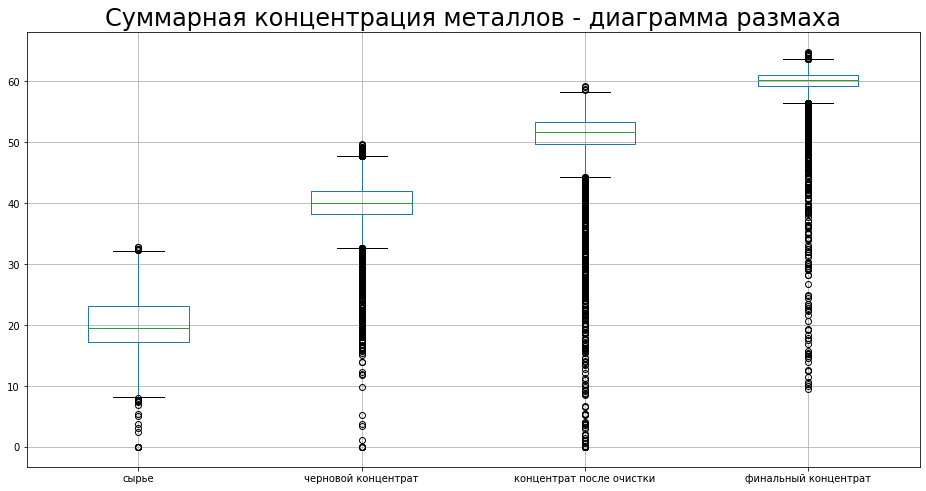

In [27]:
# дополнительно постороим диаграмму размаха для оценки плотности распределения и визуализации данных

plt.figure(figsize=(16, 8))
total_concentrate.boxplot(column=['сырье', 'черновой концентрат', 'концентрат после очистки', 'финальный концентрат' ])

plt.title('Суммарная концентрация металлов - диаграмма размаха', fontsize=24)
plt.show()

Данные очищены от аномальных значений.

In [29]:
# удаляем лишние столбцы из обучающих данных
data_train.drop(missing_columns, axis=1, inplace=True)

## Модель

### Пишем функцию для вычисления итоговой sMAPE

In [31]:
# строим функцию для метрики качества sMAPE и итоговой  
def calculate_smape(target_actual, target_predictions):
    numerator = np.abs(target_actual - target_predictions)
    denominator = (np.abs(target_actual) + np.abs(target_predictions)) / 2 
    
    return 1 / len(target_actual) * np.sum(numerator / denominator) * 100 
    
    
def calculate_final_smape(target_actual, target_predictions):
    target_actual_rougher = target_actual['rougher.output.recovery']
    target_actual_final = target_actual['final.output.recovery']
    
    target_predictions_rougher = target_predictions[:, 0]
    target_predictions_final = target_predictions[:, 1]
    
    return 0.25 * calculate_smape(target_actual_rougher, target_predictions_rougher) \
        + 0.75 * calculate_smape(target_actual_rougher, target_predictions_rougher)

In [32]:
# создаем scorer для использования его при кросс валидации 
smape_scorer = make_scorer(calculate_final_smape, greater_is_better=False)

In [33]:
# объединяем обучающую и тестовую таблицу с общим файлом 
train = data_train.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                           how = 'left', on = 'date')
# Добавим целевые признаки из общего файла в тестовый 
test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                           how = 'left', on = 'date')

In [34]:
# удаляем прпуски в значениях NaN  
train = train.dropna()
test = test.dropna()

### Обучаем различные модели, оцениваем их качество - выбираем лучшую и прверяем ее на тестовой выборке

In [35]:
# находим обучающий и целевой признаки для обучающей и тестовой выборкам 
features_train = train.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis= 'columns')
target_train = train[['rougher.output.recovery', 'final.output.recovery']]

features_test = test.drop(columns=['rougher.output.recovery', 'final.output.recovery', 'date'], axis =0)
target_test = test[['rougher.output.recovery', 'final.output.recovery']]

In [36]:
# масштабируем данные 
scaler = MinMaxScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

In [37]:
# Обучаем модель Дерево решений и находим реузльтат метрики качества 
param_grid = {'max_depth': range(2, 11), 'min_samples_split': range(1,4,2)}
model = DecisionTreeRegressor(random_state=12345)
search = GridSearchCV(model, param_grid, cv=3, scoring=smape_scorer, verbose=10)
search.fit(features_train, target_train)
print('Лучшее значение sMAPE для дерева решений: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_))


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3; 1/18] START max_depth=2, min_samples_split=1...........................
[CV 1/3; 1/18] END .........max_depth=2, min_samples_split=1; total time=   0.0s
[CV 2/3; 1/18] START max_depth=2, min_samples_split=1...........................
[CV 2/3; 1/18] END .........max_depth=2, min_samples_split=1; total time=   0.1s
[CV 3/3; 1/18] START max_depth=2, min_samples_split=1...........................
[CV 3/3; 1/18] END .........max_depth=2, min_samples_split=1; total time=   0.0s
[CV 1/3; 2/18] START max_depth=2, min_samples_split=3...........................
[CV 1/3; 2/18] END .........max_depth=2, min_samples_split=3; total time=   0.1s
[CV 2/3; 2/18] START max_depth=2, min_samples_split=3...........................
[CV 2/3; 2/18] END .........max_depth=2, min_samples_split=3; total time=   0.2s
[CV 3/3; 2/18] START max_depth=2, min_samples_split=3...........................
[CV 3/3; 2/18] END .........max_depth=2, min_sam

In [38]:
# Обучаем модель Случайный лес и находим реузльтат метрики качества
param_grid = {'n_estimators': range (10, 110, 10),
              'max_depth': range (4, 15, 1)} 

model = RandomForestRegressor(random_state=12345)
search = GridSearchCV(model, param_grid, cv=3, scoring=smape_scorer, verbose=10)
search.fit(features_train, target_train)
print('Лучшее значение sMAPE для случайного леса: {} при значениях гиперпараметров: {}'.format(-search.best_score_, search.best_params_))

Fitting 3 folds for each of 110 candidates, totalling 330 fits
[CV 1/3; 1/110] START max_depth=4, n_estimators=10..............................
[CV 1/3; 1/110] END ............max_depth=4, n_estimators=10; total time=   1.8s
[CV 2/3; 1/110] START max_depth=4, n_estimators=10..............................
[CV 2/3; 1/110] END ............max_depth=4, n_estimators=10; total time=   1.8s
[CV 3/3; 1/110] START max_depth=4, n_estimators=10..............................
[CV 3/3; 1/110] END ............max_depth=4, n_estimators=10; total time=   1.9s
[CV 1/3; 2/110] START max_depth=4, n_estimators=20..............................
[CV 1/3; 2/110] END ............max_depth=4, n_estimators=20; total time=   3.7s
[CV 2/3; 2/110] START max_depth=4, n_estimators=20..............................
[CV 2/3; 2/110] END ............max_depth=4, n_estimators=20; total time=   3.5s
[CV 3/3; 2/110] START max_depth=4, n_estimators=20..............................
[CV 3/3; 2/110] END ............max_depth=4, n

In [39]:
# Обучаем модель Линейная решрессия и находим реузльтат метрики качества

model = LinearRegression()
model.fit(features_train, target_train)
smape = cross_val_score(model, features_train, target_train, cv=3, scoring=smape_scorer, verbose=10).mean()
print('Лучшее значение sMAPE для линейной регрессии:', -smape)

[CV] START .....................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ............................... score: (test=-8.628) total time=   0.3s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END ............................... score: (test=-5.487) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] END .............................. score: (test=-11.927) total time=   0.3s
Лучшее значение sMAPE для линейной регрессии: 8.680819669322533


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s finished


In [45]:
# Проверяем работу лучшей модели Случайных лес на тестовой выборке 
model = RandomForestRegressor(max_depth=7, n_estimators=30, random_state=12345) 
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)

print('sMAPE для тестовых данных:', calculate_final_smape(target_test, predictions_test))

sMAPE для тестовых данных: 9.506857952507982


Вывод:
- По итогам исследования - лучшая модель RandomForest показывает метрику sMAPE 6.80 на кросс-валидации и 9.50 на тестовых данных  

### Построим константную модели и сравним данные   

In [42]:
# находим точность для константной модели по среднему значению 
dummy_regressor = DummyRegressor(strategy="mean") 
 
dummy_regressor.fit(features_train, target_train)
predictions = dummy_regressor.predict(features_test)

print('sMAPE для константной модели по среднему значению:', calculate_final_smape(target_test, predictions))

sMAPE для константной модели по среднему значению: 9.055387620506396


In [43]:
# находим точность для константной модели по медиане
dummy_regressor = DummyRegressor(strategy="median") 
 
dummy_regressor.fit(features_train, target_train)
predictions = dummy_regressor.predict(features_test)

print('sMAPE для константной модели по медиане:', calculate_final_smape(target_test, predictions))

sMAPE для константной модели по медиане: 8.612817646733882


Вывод:  
 - Метрика sMAPE константной модели по среднему значению 9.05, метрика sMAPE константной модели по медиане немного лучше - 8.61.

Общий вывод: 

- Произвели исследовательский анализ данных, проверили наличие пропусков, дубликатов. В тестовой выборке отсутсвуют данные, которые обозначают характеристики смеси на разных этапах обработки.
- Проверили правильность расчета данных эффективности обогащения, данные рассчитаны верно. Значение метрики MAE оказалось незначительной  
- После флотации концентрация золота и свинца увеличивается с каждым этапом, а концентрация серебра снижается.
- Распределения размеров гранул в train и test выборках одинаковы.
- Суммарные распределения концентрации имеют множество выбросов, скошены влево, а также имеют множество нулевых значений. 
- Пропуски в данных были удалены, для корректного использования данных в обучении моделей 
- Лучшая модель - RandomForest, со значением метрики sMAPE 6.80. На тестовой выборке модель предсказала значения целевых признаков с точностью 9.50
- Метрика sMAPE константной модели по среднему значению 9.05, метрика sMAPE константной модели по медиане немного лучше - 8.61.
- Проведенное исследование и полученные результаты метрик sMAPE говорят об адекватности полученной модели RandomForest. 


## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке